# Description:
This notebook is used to plot the electron diffusion coefficients in LAr.

Data source:

https://lar.bnl.gov/properties/#e-trans

Based on Y. Li, et al., "Measurement of Longitudinal Electron Diffusion in Liquid Argon", NIMA 816, 160 (2016)
ArXiv: https://arxiv.org/abs/1508.07059

### Imports

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import seaborn

### Define data

In [2]:
T = [87.3, 89.3, 91.3] # Temperature [K]
eField_intensities = [0.0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # [i/10. for i in range(11)]

# At T = 87.3 K
eMobility_0 = [567.7902, 569.6360, 570.1538, 561.6234, 530.0141, 458.6729, 399.9329, 354.3398, 318.5779, 289.9382, 266.5256, 247.0333, 230.5470, 216.4128] # Electron mobility [cm2/(Vs)]
vDrift_0    = [0.0000, 0.0057, 0.0114, 0.0281, 0.0530, 0.0917, 0.1200, 0.1417, 0.1593, 0.1740, 0.1866, 0.1976, 0.2075, 0.2164] # Electron drift velocity [cm/μs]
E_L_0       = [0.0075, 0.0078, 0.0081, 0.0090, 0.0105, 0.0133, 0.0159, 0.0184, 0.0208, 0.0230, 0.0251, 0.0271, 0.0290, 0.0308] # Effective longitudinal electron energy [eV]
D_L_0       = [4.2731, 4.4612, 4.6387, 5.0755, 5.5662, 6.1001, 6.3724, 6.5264, 6.6156, 6.6651, 6.6881, 6.6926, 6.6838, 6.6652]  # Longitudinal diffusion coefficient [cm2/s]
D_T_0       = [float('nan'), 4.4499, 4.6460, 5.3005, 6.4417, 8.5710, 10.3972, 11.9316, 13.2099, 14.2692, 15.1433, 15.8617, 16.4493, 16.9270] # Transverse diffusion coefficient [cm2/s]

# At T = 89.3 K
D_L_1       = [4.2250, 4.4110, 4.5865, 5.0183, 5.5035, 6.0314, 6.3006, 6.4529, 6.5411, 6.5900, 6.6128, 6.6173, 6.6086, 6.5901]  # Longitudinal diffusion coefficient [cm2/s]
D_T_1       = [float('nan'), 4.3998, 4.5936, 5.2408, 6.3692, 8.4744, 10.2801, 11.7972, 13.0611, 14.1085, 14.9728, 15.6831, 16.2640, 16.7364] # Transverse diffusion coefficient [cm2/s]

# At T = 91.3 K
D_L_2       = [ 4.1785, 4.3624, 4.5360, 4.9631, 5.4429, 5.9649, 6.2312, 6.3818, 6.4691, 6.5174, 6.5399, 6.5444, 6.5358, 6.5175]  # Longitudinal diffusion coefficient [cm2/s]
D_T_2       = [ float('nan'), 4.3513, 4.5430, 5.1831, 6.2990, 8.3811, 10.1669, 11.6673, 12.9173, 13.9531, 14.8079, 15.5103, 16.0849, 16.5521] # Transverse diffusion coefficient [cm2/s]

### Make plot

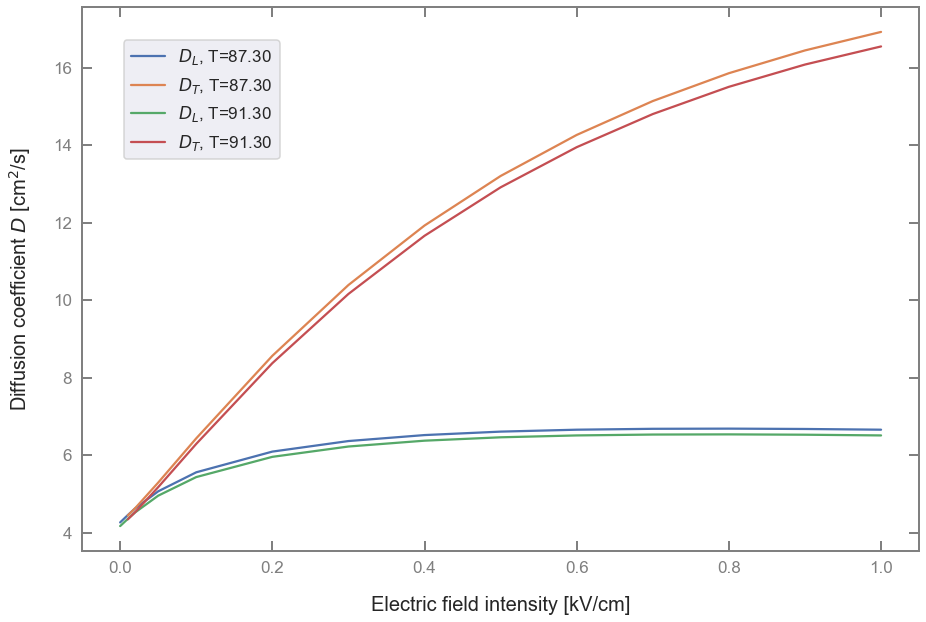

In [6]:
seaborn.set(rc={'figure.figsize':(15, 10),})
#seaborn.set(rc={'figure.figsize':(10, 10),})
seaborn.set_context('talk') # or paper

# Define parameters of the frame
fig = plt.figure() # plt.figure(figsize=(width,height))
ax = fig.add_subplot(111)
ax.patch.set_alpha(0.0)
ax.spines['bottom'].set_color('0.5') #'black', ...
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_color('0.5')
ax.spines['top'].set_linewidth(2)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_color('0.5')
ax.spines['right'].set_linewidth(2)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('0.5')
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_visible(True)

# Ticks, grid and ticks labels
ax.tick_params(direction='in', length=10, width=2,                 # direction, length and width of the ticks (in, out, inout)
               colors='0.5',                                       # color of the ticks ('black', '0.5')
               bottom=True, top=True, right=True, left=True,       # whether to draw the respective ticks
               zorder = 10.,                                       # tick and label zorder
               pad = 10.,                                          # distance between ticks and tick labels
               labelsize = 17,                                     # size of the tick labels
               labelright=False, labeltop=False)                   # wether to draw the tick labels on axes

# Axis limits
ax.set_xlim((-0.05,1.05))
#ax.set_xlim((0.,4.))
#ax.set_ylim((0.,4.5))

#plt.errorbar(x_vals,y_vals,xerr=x_err,yerr=y_err,fmt='o',label='Data') # fmt='-o'
#plt.plot(fit_boxModel_x,fit_boxModel_y,'r-',label=r'Box Model Fit: $Q_0 = %3.1f \pm %3.1f , \beta = %3.3f \pm %3.3f$' %(Q0_boxModel,Q0_boxModel_err,beta_boxModel,beta_boxModel_err))
#plt.plot(fit_birksModel_x,fit_birksModel_y,'g-',label=r'Birks Model Fit: $Q_0 = %3.1f \pm %3.1f , k_E = %3.3f \pm %3.3f$' %(Q0_birksModel,Q0_birksModel_err,k_birksModel,k_birksModel_err))

plt.plot(eField_intensities, D_L_0, '-', label=r'$D_{L}$, T=%3.2f' %T[0])
plt.plot(eField_intensities, D_T_0, '-', label=r'$D_{T}$, T=%3.2f' %T[0])
#plt.plot(eField_intensities, D_L_1, '-', label=r'$D_{L}$, T=%3.2f' %T[1])
#plt.plot(eField_intensities, D_T_1, '-', label=r'$D_{T}$, T=%3.2f' %T[1])
plt.plot(eField_intensities, D_L_2, '-', label=r'$D_{L}$, T=%3.2f' %T[2])
plt.plot(eField_intensities, D_T_2, '-', label=r'$D_{T}$, T=%3.2f' %T[2])

# Legend
#plt.legend(prop={'size': 17})
plt.legend(loc=[0.05,0.72], prop={'size': 17}) # loc='upper right', 'best'

# Axis labels
axis_labels = ['Electric field intensity [kV/cm]', 'Diffusion coefficient $D$ [cm$^2$/s]']
plt.xlabel(axis_labels[0], fontsize=20, labelpad=20)
plt.ylabel(axis_labels[1], fontsize=20, labelpad=20)

# Logarithmic y axis
#plt.ylim(bottom=0.9) #, top=200)
#plt.yscale('linear') # linear, log

# Save figure
save_name = 'electron_diffusionCoeff_vs_Efield.png'
plt.savefig(save_name, dpi=400) # bbox_inches='tight'
#plt.close()
#plt.show()